### Predict Heart Disease using Logistic Regression

#### Import Libraries 

In [18]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [19]:
df = pd.read_csv(r"C:\Users\fanta\OneDrive\10Alytics\Week 13 & 14 - Supervised ML\Heart Disease Prediction\heart.csv")

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [22]:
df.shape

(1025, 14)

### Step 1: Explore the Dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(302, 14)

### Step 2: Exploratory Data Analysis

In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
# Patients affected(1) and not affected(0) by heart disease

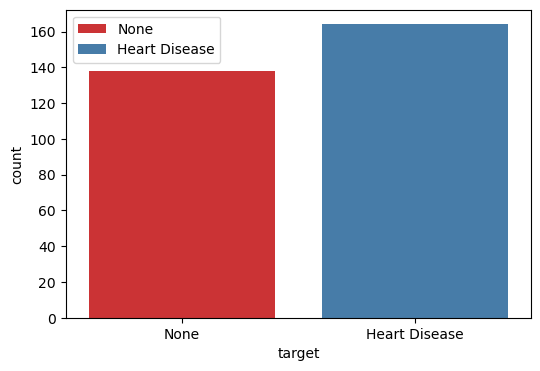

In [99]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', hue='target', palette='Set1')
plt.xticks([0,1], ['None', 'Heart Disease'])
plt.legend(labels=['None', 'Heart Disease'])
                            
plt.show();

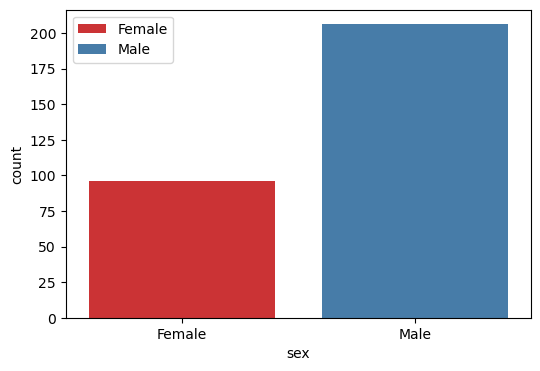

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='sex', palette='Set1')
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(labels=['Female', 'Male'])

plt.show();

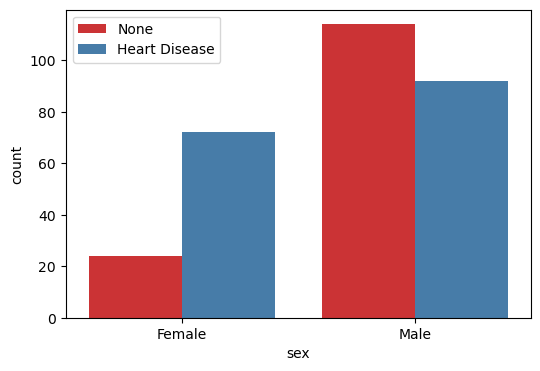

In [88]:
#Distribution of Gender based on heart disease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='target', palette='Set1')
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(labels=['None', 'Heart Disease'])

plt.show();

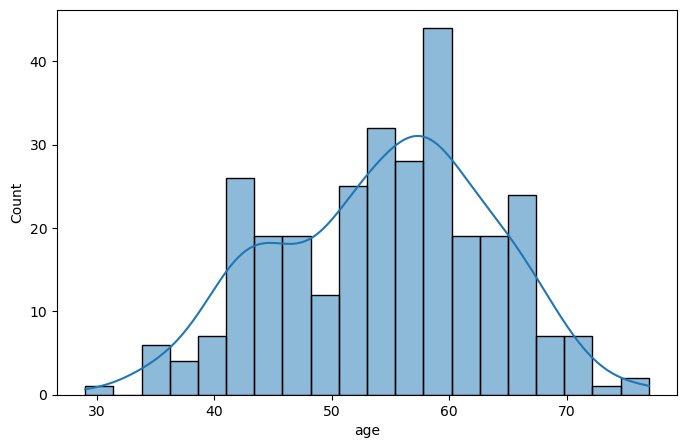

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=20, kde=True)

plt.show();

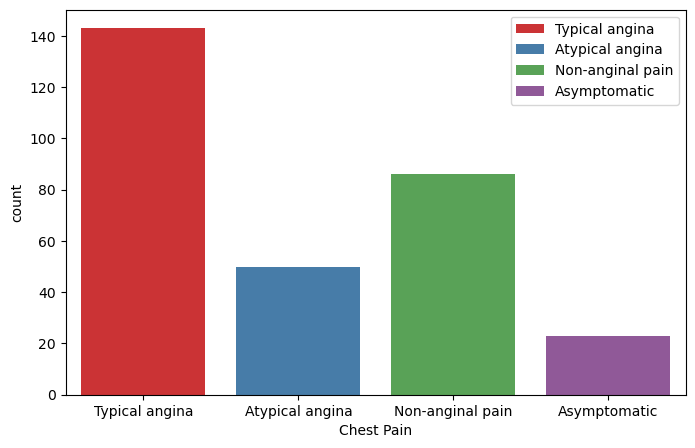

In [101]:
# Chest pain type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cp', hue='cp', palette='Set1')
plt.xticks([0,1,2,3], ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.xlabel('Chest Pain')

plt.show();

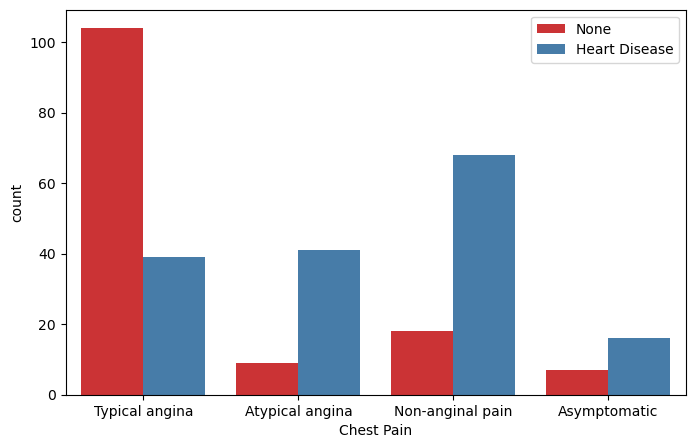

In [100]:
# Chest pain distribution based on heart disease or no heart disease
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.xticks([0,1,2,3], ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(labels=['None', 'Heart Disease'])
plt.xlabel('Chest Pain')

plt.show();

In [28]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [29]:
# Visualize the correlation

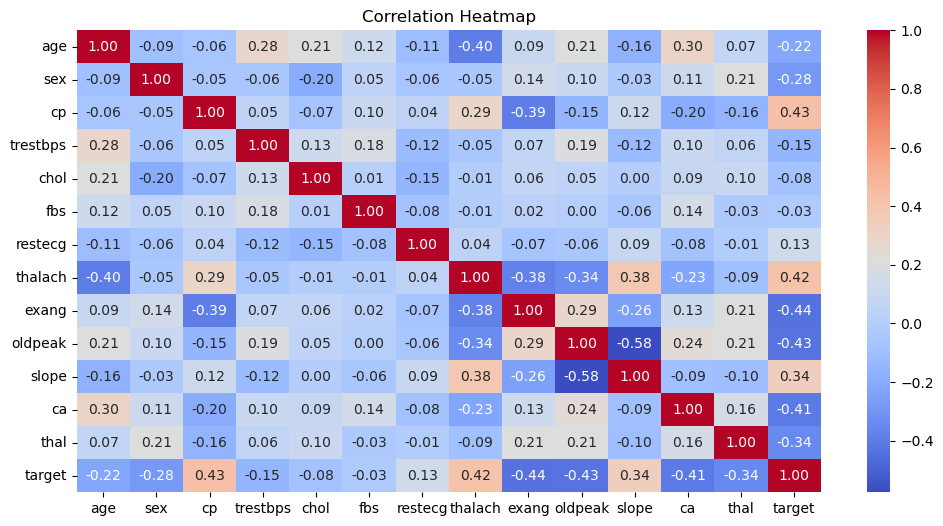

In [94]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Most positively Correlated Features

In [31]:
corr_matrix = df.corr()

target = 'target'

corr_with_target = corr_matrix[target].sort_values(ascending=False)

print("Most Positively Correlated Features:")
print(corr_with_target.head(6))

Most Positively Correlated Features:
target     1.000000
cp         0.432080
thalach    0.419955
slope      0.343940
restecg    0.134874
fbs       -0.026826
Name: target, dtype: float64


#### Most positively Correlated Features

In [32]:
corr_matrix = df.corr()

target = 'target'

corr_with_target = corr_matrix[target].sort_values(ascending=False)

print("Most Positively Correlated Features:")
print(corr_with_target.tail(5))

Most Positively Correlated Features:
sex       -0.283609
thal      -0.343101
ca        -0.408992
oldpeak   -0.429146
exang     -0.435601
Name: target, dtype: float64


### Step 3: Prepare the Data

In [33]:
# Split features and target
X = df[["cp","thalach","slope","restecg","fbs","sex","thal","ca","exang","oldpeak"]]
y = df["target"]

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 4: Train the model

In [36]:
# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Step 5: Evaluate the model

In [37]:
# Predict
y_pred = model.predict(X_test_scaled)

In [38]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [39]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8032786885245902

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



### Step 6: Save the model

In [40]:
joblib.dump(model, 'heart_model.joblib')

['heart_model.joblib']

### Done! Built a working heart disease prediction